In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from tqdm import tqdm
%matplotlib inline  

mu1, s1, n1 = 100, 5, 100
mu2, s2, n2 = 102, 5, 100
params = ((mu1, s1, n1), (mu2, s2, n2))


In [36]:
def generate_data(params, days, alpha):

  df = pd.DataFrame()
  stat_result = pd.DataFrame()

  for day in range(1, days + 1):
      
      # Generate Data
      df1 = pd.DataFrame({'value': np.random.normal(mu1, s1, n1)})
      df1['date'] = day
      df1['group'] = 'control'
      df2 = pd.DataFrame({'value': np.random.normal(mu2, s2, n2)})
      df2['date'] = day
      df2['group'] = 'experiment'
      
      # Aggregate Data
      df = df.append(df1).append(df2)
      
      # Compute Stats
      fit = stats.ttest_ind(df[df.group == 'experiment'].value, df[df.group == 'control'].value)
      stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
      
      # Compute result
      # current_data_stat = df.groupby(['group'], as_index=False).agg({'value': 'mean'})
      # current_data_stat['date'] = current_date
      # daily_data = daily_data.append(current_data_stat)
      
      result = (1 if fit[1] < alpha else 0, round(fit[1], 5))
      
      return result


In [37]:
for i in tqdm(range(100)):
  print(generate_data(params, 20, 0.05))

 19%|█▉        | 19/100 [00:00<00:02, 39.26it/s]

(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 1e-05)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 1e-05)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)

 50%|█████     | 50/100 [00:00<00:00, 62.85it/s]


(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)

 81%|████████  | 81/100 [00:00<00:00, 89.57it/s]


(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 1e-05)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)


100%|██████████| 100/100 [00:00<00:00, 135.70it/s]

(1, 0.0)
(1, 0.0)
(1, 0.0)
(1, 0.0)


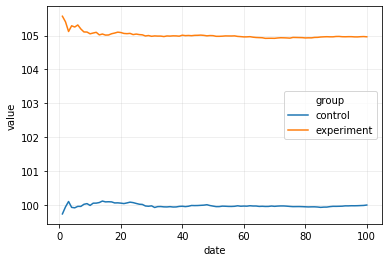

In [15]:
ax = sns.lineplot(data=daily_data, x="date", y="value", hue='group')
ax.grid(alpha=0.25)

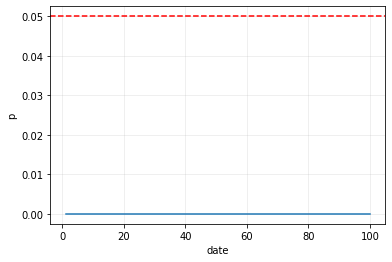

In [17]:
ax = sns.lineplot(data=stat_result, x="date", y="p")
ax.axhline(0.05, ls='--', color='red')
ax.grid(alpha=0.25)